In [22]:
import numpy as np
from numpy.random import randn, uniform
import matplotlib.pyplot as plt

np.random.seed(2)
D = 2 # Dimension of the weight space
N_Data_1 = 15 # Number of samples in dataset 1
N_Data_2 = 30 # Number of samples in dataset 2
sigma_w = 2.0
prior_mean = [-5, 0]
prior_precision = np.eye(D) / sigma_w**2
# We summarize distributions using their parameters
prior_par = {'mean': prior_mean, 'precision': prior_precision}
# Here we draw the true underlying w. We do this only once
w_tilde = sigma_w * randn(2) + prior_mean
# Draw the inputs for datasets 1 and 2
X_Data_1 = 0.5 * randn(N_Data_1, D)
X_Data_2 = 0.1 * randn(N_Data_2, D) + 0.5
# Draw the outputs for the datasets
sigma_y = 1.0
y_Data_1 = np.dot(X_Data_1, w_tilde) + sigma_y * randn(N_Data_1)
y_Data_2 = np.dot(X_Data_2, w_tilde) + sigma_y * randn(N_Data_2)
# The complete datasets
Data_1 = {'X': X_Data_1,
          'y': y_Data_1}
Data_2 = {'X': X_Data_2,
          'y': y_Data_2}

def posterior_par(prior_par, Data, sigma_y):
    """Calculate posterior parameters.

    Calculate posterior mean and covariance for given prior mean and
    covariance in the par dictionary, given data and given noise
    standard deviation.
    """
    X = Data['X']
    y = Data['y']
    var_y = sigma_y**2
    w_0 = prior_par['mean']
    K_0 = prior_par['precision']
    K_N = K_0 + (1/var_y) * X.T @ X
    w_N = np.linalg.solve(K_N , K_0 @ w_0)  + (1/var_y) * np.linalg.solve(K_N, X.T @ y)  
    
    return {'mean': w_N, 'precision': K_N}

print(posterior_par(prior_par, Data_1, sigma_y))
print(posterior_par(prior_par, Data_2, sigma_y))

{'mean': array([-7.08044855,  0.13935689]), 'precision': array([[ 3.68963541, -0.1132696 ],
       [-0.1132696 ,  5.6217687 ]])}
{'mean': array([-6.07067476, -0.21423218]), 'precision': array([[7.36552119, 7.34837972],
       [7.34837972, 8.50305882]])}


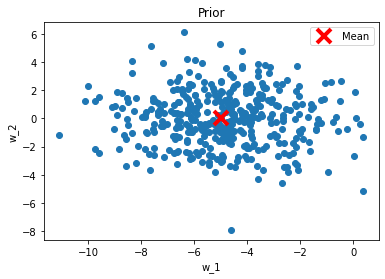

In [69]:
def visual_Gauss2(mean, covariance, name='Plot'):
        samples = np.random.multivariate_normal(mean=mean, cov=covariance, size=400)
        x = samples[:,0]
        y = samples[:,1]
        plt.scatter(x, y)
        plt.plot(mean[0], mean[1] ,'rx', markersize=14, mew=4)
        plt.xlabel('w_1')
        plt.ylabel('w_2')
        plt.legend(['Mean'])
        plt.title(name)
        
        plt.show()
        
visual_Gauss2(prior_mean, np.linalg.inv(prior_precision), 'Prior')


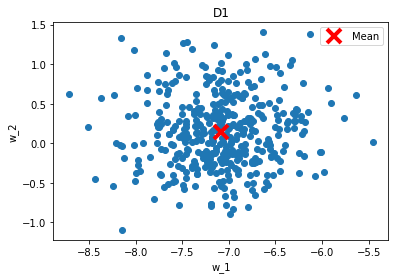

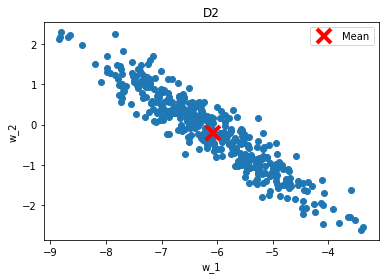

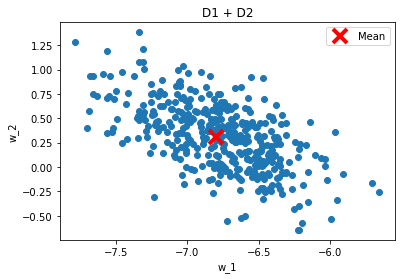

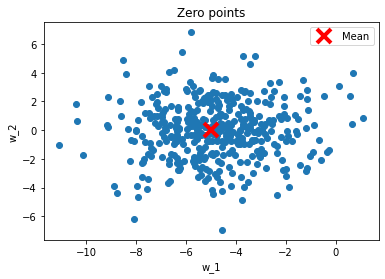

In [71]:
posterior_1 = posterior_par(prior_par, Data_1, sigma_y)
posterior_2 = posterior_par(prior_par, Data_2, sigma_y)
posterior_12 = posterior_par(prior_par,  {'X': np.row_stack((Data_1['X'],Data_2['X'])),
                                          'y': np.concatenate((Data_1['y'],Data_2['y']))}, sigma_y)
posterior_0 = posterior_par(prior_par,  {'X': np.empty((0,2)), 'y': np.array([])}, sigma_y)
visual_Gauss2(posterior_1['mean'], np.linalg.inv(posterior_1['precision']), name='D1')
visual_Gauss2(posterior_2['mean'], np.linalg.inv(posterior_2['precision']), name='D2')
visual_Gauss2(posterior_12['mean'], np.linalg.inv(posterior_12['precision']), name='D1 + D2')
visual_Gauss2(posterior_0['mean'], np.linalg.inv(posterior_0['precision']), name='Zero points')


In [74]:
new_posterior_2 = posterior_par(posterior_1, Data_2, sigma_y)
# Comparison
print('Mean comparison (abs difference): ', np.abs(new_posterior_2['mean'] - posterior_12['mean']))
print('Precision comparison (abs difference): ', np.abs(new_posterior_2['precision'] - posterior_12['precision']))

Mean comparison (abs difference):  [8.88178420e-16 1.44328993e-15]
Precision comparison (abs difference):  [[0.0000000e+00 8.8817842e-16]
 [8.8817842e-16 0.0000000e+00]]


In [64]:
Data_2['X'].shape

(30, 2)